In [37]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets


So far, we’ve learned to load datasets along with various ways to preprocess the data. In this section, we’ll create a simple custom dataset consisting of numbers and text. We’ll talk about the Dataset object in PyTorch that helps to handle numerical and text files, and how one could go about optimizing the pipeline for a certain task. The trick here is to abstract the __getitem__() and __len__() methods in the Dataset class.

The __getitem__() method returns the selected sample in the dataset by indexing.

The  __len__() method returns the total size of the dataset. For example, if your dataset contains 1,00,000 samples, the len method should return 1,00,000.

In [38]:
class Dataset(object):
    def __getitem__(self, index):
      
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

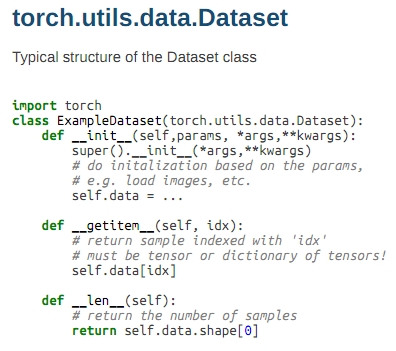

Creating a custom dataset isn’t complex, but as an additional step to the typical procedure of loading data, it is necessary to build an interface in order to get a nice abstraction (a nice syntactic sugar to say the least). Now we’ll create a new dataset that has numbers and their squared values. Let us call our dataset SquareDataset. Its purpose is to return squares of values in the range [a,b]. Below is the relevant code:

In [39]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

class SquareDataset(Dataset):
     def __init__(self, a=0, b=1):
         super(Dataset, self).__init__()
         assert a <= b
         self.a = a
         self.b = b
        
     def __len__(self):
         return self.b - self.a + 1
        
     def __getitem__(self, index):
        assert self.a <= index <= self.b
        return index, index**2

In [40]:
data_train = SquareDataset(a=1,b=64)
data_train_loader = DataLoader(data_train, batch_size=32, shuffle=True)
print(len(data_train_loader ))

2


In [41]:
data_train = SquareDataset(a=1,b=64)
data_train_loader = DataLoader(data_train, batch_size=4, shuffle=True)
print(len(data_train_loader ))

16


In the above code block, we created a Python class named **SquareDataset** that inherits the D**ataset clas**s from PyTorch. Next, we called an __init__() *constructor* where a and b were initialized to 0 and 1, respectively. The *super class* is used to access the len and get_item methods from the inherited Dataset class. Next we used the assert statement to check if a is less than or equal to b, as we want to create a dataset wherein the values would lie between a and b.

We then created a dataset using the SquareDataset class, where the data values lie in the range 1 to 64. We loaded this into a variable named data_train. Lastly, the Dataloader class created an iterator over the data stored in data_train_loader with a batch_size initialized to 64, and shuffle set to True.

Data loaders exploit the goodness of Python by employing pieces of object-oriented programming concepts. A good exercise would be to go through a variety of data loaders with a number of popular datasets including CelebA, PIMA, COCO, ImageNet, CIFAR-10/100, etc.

### torch.utils.data.Dataset: for images

### for image segmentation task: image pair{image,label}

segmentation: label: map, mask, target

In [42]:
import torch
import imageio
#similar to:
#from torch.utils.data import Dataset
#class ImageDataset_segment(Dataset):
class ImageDataset_segment(torch.utils.data.Dataset): 
    def __init__(self, root, N, *args,**kwargs): 
        super().__init__(*args,**kwargs) 
        self.input, self.target = [], [] 
        for i in range(N): 
            t = imageio.imread(f'{root}/image{i}.png') #[h, w, c]
            t = torch.from_numpy(t).permute(2,0,1) 
            # l = imageio.imread(f'target{i}.png') 
            l= imageio.imread(f'{root}/target{i}.png') 
            l = torch.from_numpy(l).permute(2,0,1) 
            self.input.append(t) 
            self.target.append(l) 
    def __getitem__(self, idx): 
        return {'input': self.input[idx], 'target': self.target[idx]} 
    def __len__(self): 
        return len(self.input) 

In [43]:
import torch
import os
dataPath = os.getcwd() + '/Data_skin_tuto1/data/'
print(dataPath)

/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_skin_tuto1/data/


In [44]:
myImageDataset=ImageDataset_segment(dataPath,5)
# # iterating thruogh the samples
# for sample in myImageDataset
#     input = sample['input'].cpu() # or .cuda()
#     target = sample['target].cpu() # or .to(device)

Show images, label maps, and corresponding contours

<ipython-input-45-9b157f27daa5>:12: UserWarning: No contour levels were found within the data range.
  plt.contour(mask.permute(1,2,0)[:,:,1],[0],colors='g',linewidth=1.5);
<ipython-input-45-9b157f27daa5>:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(mask.permute(1,2,0)[:,:,1],[0],colors='g',linewidth=1.5);


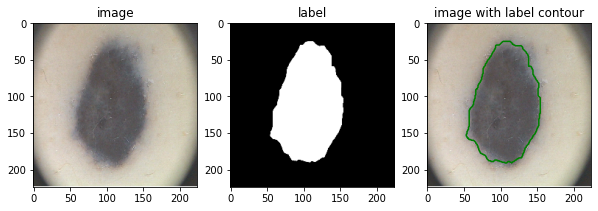

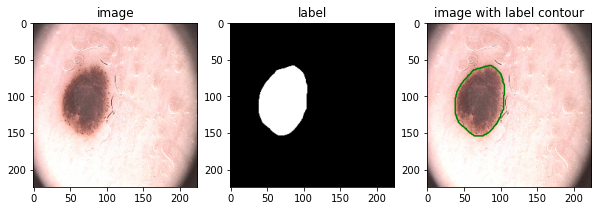

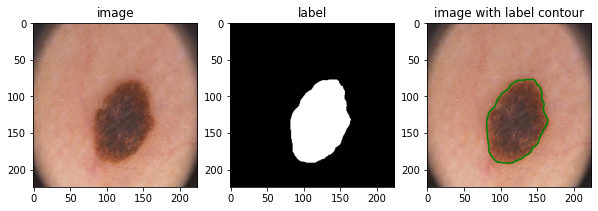

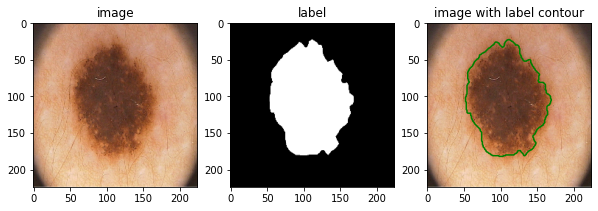

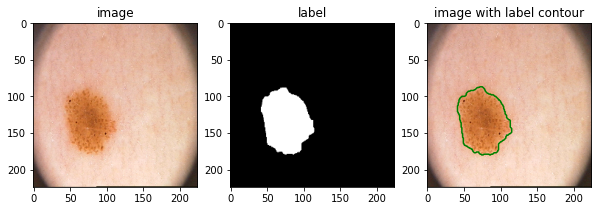

In [45]:
import matplotlib.pyplot as plt
for i, example in enumerate(myImageDataset):
    img=example['input']
    mask=example['target']
    # %matplotlib inline
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.figure(i)
    plt.clf
    plt.subplot(1,3,1).imshow(img.permute(1,2,0)),plt.title('image')
    plt.subplot(1,3,2).imshow(mask.permute(1,2,0)),plt.title('label')
    plt.subplot(1,3,3).imshow(img.permute(1,2,0)),plt.title('image with label contour')
    plt.contour(mask.permute(1,2,0)[:,:,1],[0],colors='g',linewidth=1.5);
    # plt.show(block=False),plt.pause(0.01);

In [46]:
# # iterating through the samples
for sample in myImageDataset: 
    input = sample['input'].cpu()  # or .cuda() 
    target = sample['target'].cpu()  # or .to(device) 

In [47]:
len(input)

3

In [48]:
img0=input[2]
label0=target[2]

(<matplotlib.image.AxesImage at 0x7f819b978ee0>, Text(0.5, 1.0, 'label'))

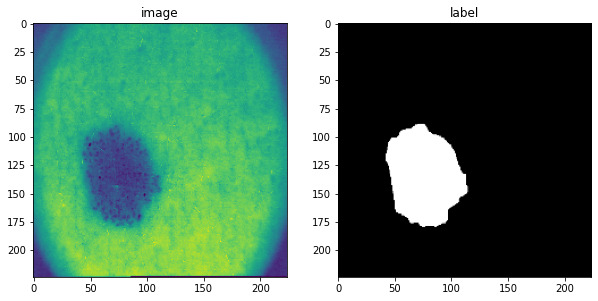

In [49]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.subplot(121)
plt.imshow(img0),plt.title('image')
plt.subplot(122)
plt.imshow(label0,cmap='gray'),plt.title('label')

In [50]:
print(img0.size())

torch.Size([224, 224])


In [51]:
data_path='/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/'
img_data=torch.Tensor(5,3,224,224)
label_data=torch.Tensor(5,3,224,224)

# img_data=torch.Tensor(5,224,224)
# label_data=torch.Tensor(5,224,224)
for idx,example in enumerate(myImageDataset):
    img_data[idx]=example['input']
    label_data[idx]=example['target']

torch.save(img_data,data_path+'sample_skin_data.pt')
torch.save(label_data,data_path+'sample_skin_label.pt')


### torch.utils.data.Dataset: images for classification task

Read images from a folder, image classes are embedded in file names; 
Preprocessing operations are defined inside the dataset

In [52]:
import numpy as np
from PIL import Image
import glob
from torch.utils.data.dataset import Dataset

In [53]:
class CustomDatasetFromFile(Dataset):
    def __init__(self, folder_path):
        """
        A dataset example where the class is embedded in the file names
        This data example also does not use any torch transforms
        Args:
            folder_path (string): path to image folder
        """
        # Get image list
        self.image_list = glob.glob(folder_path+'*')
        # Calculate len
        self.data_len = len(self.image_list)

    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_path = self.image_list[index]
        # Open image
        im_as_im = Image.open(single_image_path)# cv2.imread()

        # Do some operations on image
        # Convert to numpy, dim = 28x28
        im_as_np = np.asarray(im_as_im)/255
        # Add channel dimension, dim = 1x28x28
        # Note: You do not need to do this if you are reading RGB images
        # or i there is already channel dimension
        im_as_np = np.expand_dims(im_as_np, 0)
        # Some preprocessing operations on numpy array
               # ...
        # Transform image to tensor, change data type
        im_as_ten = torch.from_numpy(im_as_np).float()

        # Get label(class) of the image based on the file name
        class_indicator_location = single_image_path.rfind('_c')
        label = int(single_image_path[class_indicator_location+2:class_indicator_location+3])
        return (im_as_ten, label)# data pair

    def __len__(self):
        return self.data_len

In [56]:
custom_mnist_from_file = CustomDatasetFromFile(os.getcwd()+'/Data_skin_tuto1/data/mnist_with_class/')

In [57]:
train_data=torch.Tensor(49,28,28)
train_label=torch.LongTensor(49)
for idx in range(1,49):
    tt1,tt2=custom_mnist_from_file[idx]
    train_data[idx]=tt1
    train_label[idx]=tt2
torch.save(train_data,'train_classify_data.pt')
torch.save(train_label,'train_classify_label.pt')

torch.Size([49, 28, 28]) torch.Size([49])
The label of the image is: tensor(0)


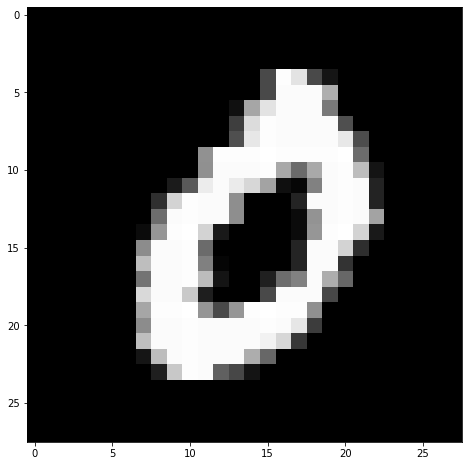

In [58]:
print(train_data.shape,train_label.shape)
plt.imshow(train_data[10], cmap='gray')
print("The label of the image is:", train_label[10])
# print(train_label[10])

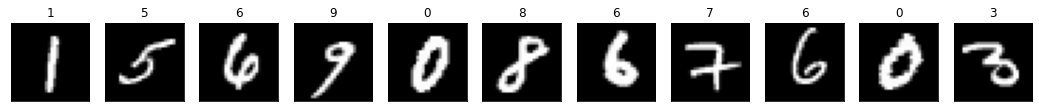

In [59]:
plt.rcParams['figure.figsize'] = [20, 5]
for idx in range(1,12):
  plt.subplot(1,12,idx).imshow(train_data[idx],cmap='gray'),plt.xticks([]),plt.yticks([]),plt.title(train_label[idx].numpy())

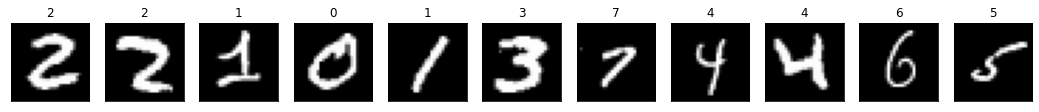

In [60]:
plt.rcParams['figure.figsize'] = [20, 5]
for idx in range(1,12):
  plt.subplot(1,12,idx).imshow(train_data[idx+12],cmap='gray'),plt.xticks([]),plt.yticks([]),plt.title(train_label[idx+12].numpy())

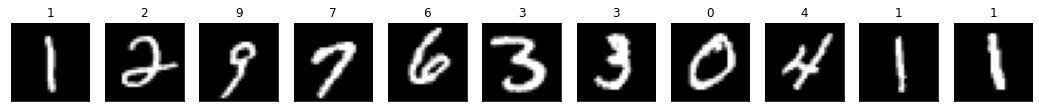

In [61]:
plt.rcParams['figure.figsize'] = [20, 5]
for idx in range(1,12):
  plt.subplot(1,12,idx).imshow(train_data[idx+24],cmap='gray'),plt.xticks([]),plt.yticks([]),plt.title(train_label[idx+24].numpy())

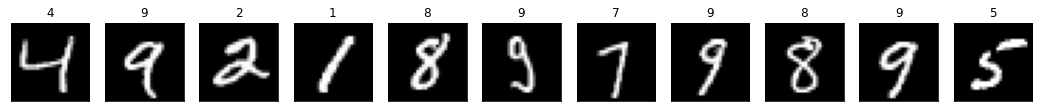

In [62]:
plt.rcParams['figure.figsize'] = [20, 5]
for idx in range(1,12):
  plt.subplot(1,12,idx).imshow(train_data[idx+36],cmap='gray'),plt.xticks([]),plt.yticks([]),plt.title(train_label[idx+36].numpy())

Có thể load các ví dụ đã lưu, ví dụ:

In [70]:
data_folder='/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/'
'''
x_train= np.load(data_folder+'x_trainPH2_128.npy')
y_train= np.load(data_folder+'y_trainPH2_128.npy')

x_test= np.load(data_folder+'x_testPH2_128.npy')
y_test= np.load(data_folder+'y_testPH2_128.npy')

x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
x_train = x_train.permute(0, 3, 1, 2).float()
y_train = y_train.permute(0, 3, 1, 2).float()
x_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).float()
x_test = x_test.permute(0, 3, 1, 2)
y_test = y_test.permute(0, 3, 1, 2)
train_ds=(x_train,y_train)  # muốn thực hiện augmentation thì nên đưa np.load vào class Dataset
val_ds=(x_test,y_test)


BATCH_SIZE = 4
NUM_WORKERS = 2
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
PIN_MEMORY = True
train_loader_1 = DataLoader(
    train_ds,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    pin_memory = PIN_MEMORY,
    shuffle=True,
)
val_loader_1 = DataLoader(
    val_ds,
    batch_size=BATCH_SIZE,
    num_workers = NUM_WORKERS,
    pin_memory = PIN_MEMORY,
    shuffle=False
)
'''

"\nx_train= np.load(data_folder+'x_trainPH2_128.npy')\ny_train= np.load(data_folder+'y_trainPH2_128.npy')\n\nx_test= np.load(data_folder+'x_testPH2_128.npy')\ny_test= np.load(data_folder+'y_testPH2_128.npy')\n\nx_train = torch.tensor(x_train)\ny_train = torch.tensor(y_train)\nx_train = x_train.permute(0, 3, 1, 2).float()\ny_train = y_train.permute(0, 3, 1, 2).float()\nx_test = torch.tensor(x_test).float()\ny_test = torch.tensor(y_test).float()\nx_test = x_test.permute(0, 3, 1, 2)\ny_test = y_test.permute(0, 3, 1, 2)\ntrain_ds=(x_train,y_train)  # muốn thực hiện augmentation thì nên đưa np.load vào class Dataset\nval_ds=(x_test,y_test)\n\n\nBATCH_SIZE = 4\nNUM_WORKERS = 2\nIMAGE_HEIGHT = 128\nIMAGE_WIDTH = 128\nPIN_MEMORY = True\ntrain_loader_1 = DataLoader(\n    train_ds,\n    batch_size = BATCH_SIZE,\n    num_workers = NUM_WORKERS,\n    pin_memory = PIN_MEMORY,\n    shuffle=True,\n)\nval_loader_1 = DataLoader(\n    val_ds,\n    batch_size=BATCH_SIZE,\n    num_workers = NUM_WORKERS,\n 

In [68]:
from torch.utils.data.dataset import Dataset  
class Data_from_npy(Dataset):
  def __init__(self, image_path, mask_path, transform=None):
    self.image_path = image_path
    self.mask_path = mask_path
    self.image = np.load(image_path)
    self.mask = np.load(mask_path)
    self.transform = transform

  def __len__(self):
    return self.image.shape[0]

  def __getitem__(self, index):
    image = self.image[index]
    mask = self.mask[index].squeeze()

    if self.transform is not None:
      augmentations = self.transform(image=image, mask=mask)
      image = augmentations["image"]
      mask = augmentations["mask"]
    return image, mask

In [71]:
image_path=data_folder+'x_trainPH2_128.npy'
mask_path=data_folder+'y_trainPH2_128.npy'
train_data = Data_from_npy(image_path, mask_path, transform=None)

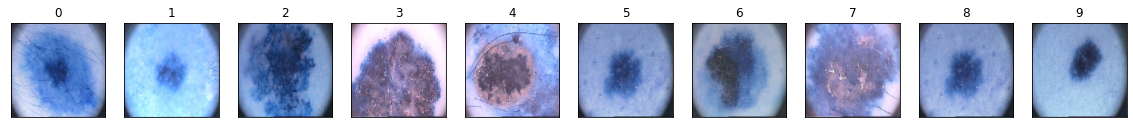

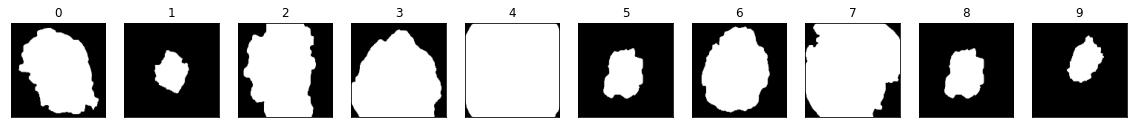

In [75]:
numshow=10
img_set = np.random.randint(len(train_data), size = numshow)
plt.figure(1)
plt.rcParams['figure.figsize']=[20,5]
for i,j in enumerate(img_set):
  X,y = train_data[j]
  plt.subplot(1,numshow,i+1).imshow(X, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title(i)

plt.figure(2)
plt.rcParams['figure.figsize']=[20,5]
for i,j in enumerate(img_set):
  X,y = train_data[j]
  plt.subplot(1,numshow,i+1).imshow(y, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title(i)

<ipython-input-76-600ce763d793>:6: UserWarning: No contour levels were found within the data range.
  plt.contour(y,[0],colors='r',linewidth=1.5)
<ipython-input-76-600ce763d793>:6: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(y,[0],colors='r',linewidth=1.5)


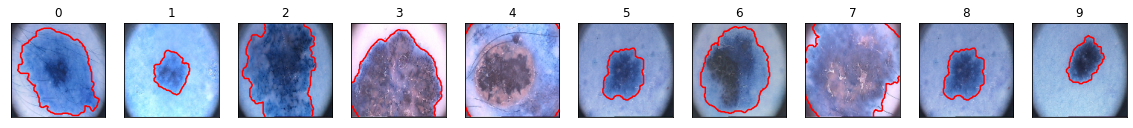

In [76]:
plt.figure(3)
plt.rcParams['figure.figsize'] = [20, 5]
for i,j in enumerate(img_set):
  X, y = train_data[j]
  plt.subplot(1,numshow,i+1).imshow(X,cmap='gray'),plt.xticks([]),plt.yticks([]),plt.title(i)
  plt.contour(y,[0],colors='r',linewidth=1.5)

### Homework: Thử lại với opencv

In [63]:
import torch
import cv2
import numpy as np
from torchvision import transforms

'''
similar to:
from torch.utils.data import Dataset
class ImageDataset_segment(Dataset): 
'''
class datasets(torch.utils.data.Dataset): 
    def __init__(self, root, N, *args,**kwargs): 
        super().__init__(*args,**kwargs) 
        self.input, self.target = [], [] 
        for i in range(N): 
            image = cv2.imread(root + f'/image{i}.png') 
            target = cv2.imread(root + f'/target{i}.png')
            self.input.append(transforms.ToTensor()(image))
            self.target.append(transforms.ToTensor()(target))
    def __getitem__(self, idx): 
        return {'input': self.input[idx], 'target': self.target[idx]}
    def __len__(self): 
        return len(self.input) 

In [64]:
dataPath = '/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_skin_tuto1/'
myImageDataset = datasets(dataPath,5) 

<ipython-input-65-a1bd5330f3bb>:12: UserWarning: No contour levels were found within the data range.
  plt.contour(mask.permute(1,2,0)[:,:,1],[0],colors='g',linewidth=1.5)
<ipython-input-65-a1bd5330f3bb>:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(mask.permute(1,2,0)[:,:,1],[0],colors='g',linewidth=1.5)


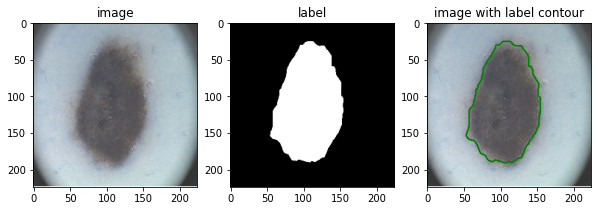

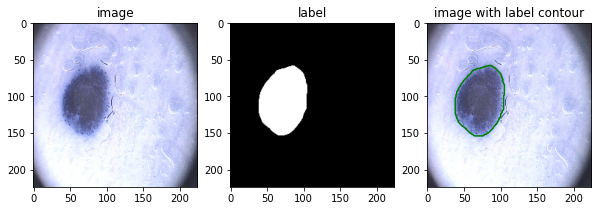

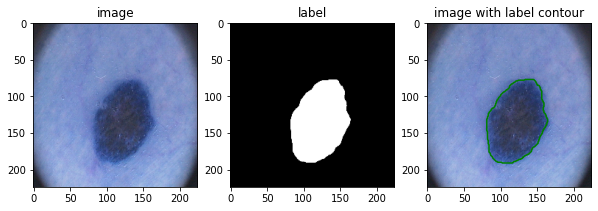

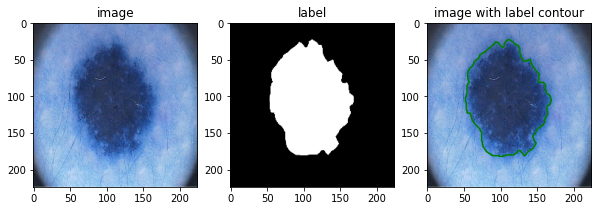

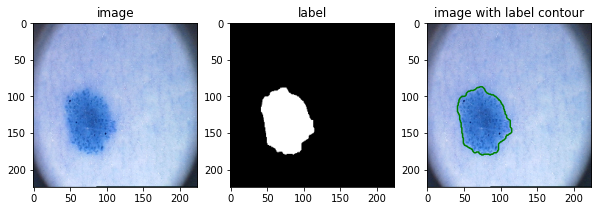

In [65]:
import matplotlib.pyplot as plt
for i, example in enumerate(myImageDataset):
    img=example['input']
    mask=example['target']
    # %matplotlib inline
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.figure(i)
    plt.clf
    plt.subplot(1,3,1).imshow(img.permute(1,2,0)),plt.title('image')
    plt.subplot(1,3,2).imshow(mask.permute(1,2,0)),plt.title('label')
    plt.subplot(1,3,3).imshow(img.permute(1,2,0)),plt.title('image with label contour')
    plt.contour(mask.permute(1,2,0)[:,:,1],[0],colors='g',linewidth=1.5)

Lưu lại dưới dạng file .npy

In [66]:
data_path='/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/'
img_data=torch.Tensor(5,3,224,224)
label_data=torch.Tensor(5,3,224,224)

for idx,example in enumerate(myImageDataset):
    img_data[idx]=example['input']
    label_data[idx]=example['target']

torch.save(img_data,data_path+'image.npy')
torch.save(label_data,data_path+'label.npy')

End.